#### Load Data

In [70]:
import pandas as pd

# loading the data
pd.set_option('display.max_columns', None)

# US Accdients (2016 - 2023)
# https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
accident_df = pd.read_csv('../DSME6756-Project/data/US_Accidents_March23.csv') 
accident_df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day


### Data Cleansing & Preprocessing

##### 1. Formatting Start_Time & End_Time

In [71]:
# Transform the date fomat 
accident_df['Start_Time'] = pd.to_datetime(accident_df['Start_Time'],format='ISO8601')
accident_df['End_Time'] = pd.to_datetime(accident_df['End_Time'],format='ISO8601')

# Prepare day_of_week
accident_df = accident_df.copy()
accident_df['Start_Day'] = accident_df['Start_Time'].dt.date
accident_df['End_Day'] = accident_df['End_Time'].dt.date
accident_df['Date'] = pd.to_datetime(accident_df['Start_Day'])
accident_df['day_of_week'] = accident_df['Date'].dt.day_name()
accident_df['month'] = accident_df['Date'].dt.month

accident_df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day,End_Day,Date,day_of_week,month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016-02-08,2016-02-08,2016-02-08,Monday,2
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016-02-08,2016-02-08,2016-02-08,Monday,2


In [72]:
# Get Subset of Data: County = Miami-Dade (~251K)
accident_df = accident_df[accident_df.County == 'Miami-Dade']

print("data count=" + str(len(accident_df)))


data count=251601


In [73]:
# Calculate the average number of accidents per day
daily_accident_counts = accident_df.groupby('Date').size()

## Calculate the average number of accidents per day
average_accidents_per_day = daily_accident_counts.mean()
print("Average Accidents Per Day=" + str(average_accidents_per_day))

Average Accidents Per Day=105.18436454849498


##### 2. Duration & One-hot handling

In [74]:
from sklearn.preprocessing import LabelEncoder

# Categourize the columns 
one_hot_col = ['Severity','day_of_week', 'month', 'City', 'Airport_Code', 'Wind_Direction', 'Weather_Condition']
label_col = ['Amenity',	'Bump',	'Crossing',	'Give_Way',	'Junction',	'No_Exit',	'Railway',	'Roundabout',	'Station',	'Stop',	'Traffic_Calming',	'Traffic_Signal',	'Turning_Loop',	'Sunrise_Sunset',	'Civil_Twilight',	'Nautical_Twilight',	'Astronomical_Twilight']
# num_col = ['Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# create the ohe encoder
df_encoded = pd.get_dummies(accident_df, columns=one_hot_col)

# create the label encoder
le = LabelEncoder()
for col in label_col:
    df_encoded[col] = le.fit_transform(accident_df[col])

df_encoded.head(2)

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,County,State,Zipcode,Country,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day,End_Day,Date,Severity_1,Severity_2,Severity_3,Severity_4,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,City_Aventura,City_Bal Harbour,City_Bay Harbor Islands,City_Biscayne Park,City_Coral Gables,City_Cutler Bay,City_Doral,City_El Portal,City_Florida City,City_Golden Beach,City_Hialeah,City_Hollywood,City_Homestead,City_Key Biscayne,City_Medley,City_Miami,City_Miami Beach,City_Miami Gardens,City_Miami Lakes,City_Miami Shores,City_Miami Springs,City_North Bay Village,City_North Miami,City_North Miami Beach,City_North Westside,City_Opa Locka,City_Opa-Locka,City_Palmetto Bay,City_South Miami,City_Sunny Isles Beach,City_Surfside,City_Sweetwater,City_Virginia Gardens,City_West Miami,Airport_Code_KHST,Airport_Code_KHWO,Airport_Code_KMIA,Airport_Code_KOPF,Airport_Code_KTMB,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Funnel Cloud,Weather_Condition_Haze,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_Squalls / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain
116057,A-116064,Source2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,SW 152nd St,Miami-Dade,FL,33157-1147,US,US/Eastern,2016-11-30 16:53:00,80.1,NaN,71.0,29.96,10.0,9.2,NaN,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2016-11-30,2016-11-30,2016-11-30,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

##### 3. Label Generation

In [75]:
# Generate new column Duration of Accident (in Minutes)
df_encoded['Duration_Minutes'] = (df_encoded['End_Time'] - df_encoded['Start_Time']).dt.total_seconds() / 60
df_encoded.head(2)

,ID,Source,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,County,State,Zipcode,Country,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Day,End_Day,Date,Severity_1,Severity_2,Severity_3,Severity_4,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,City_Aventura,City_Bal Harbour,City_Bay Harbor Islands,City_Biscayne Park,City_Coral Gables,City_Cutler Bay,City_Doral,City_El Portal,City_Florida City,City_Golden Beach,City_Hialeah,City_Hollywood,City_Homestead,City_Key Biscayne,City_Medley,City_Miami,City_Miami Beach,City_Miami Gardens,City_Miami Lakes,City_Miami Shores,City_Miami Springs,City_North Bay Village,City_North Miami,City_North Miami Beach,City_North Westside,City_Opa Locka,City_Opa-Locka,City_Palmetto Bay,City_South Miami,City_Sunny Isles Beach,City_Surfside,City_Sweetwater,City_Virginia Gardens,City_West Miami,Airport_Code_KHST,Airport_Code_KHWO,Airport_Code_KMIA,Airport_Code_KOPF,Airport_Code_KTMB,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Funnel Cloud,Weather_Condition_Haze,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_Squalls / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Duration_Minutes
116057,A-116064,Source2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.627699,-80.374451,NaN,NaN,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,SW 152nd St,Miami-Dade,FL,33157-1147,US,US/Eastern,2016-11-30 16:53:00,80.1,NaN,71.0,29.96,10.0,9.2,NaN,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2016-11-30,2016-11-30,2016-11-30,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

##### 4. Remove Irrelevant Columns

In [76]:
columns_to_remove = ['End_Lat', 'End_Lng', 'Description'
                     , 'Zipcode', 'Street'
                     , 'Start_Lat', 'Start_Lng', 'Source'
                     , 'Timezone', 'Weather_Timestamp'
                     , 'State', 'ID'
                     # , 'Distance(mi)'
                     , 'Start_Day', 'End_Day'
                     , 'Start_Time', 'End_Time'
                     , 'Date'
                     , 'County', 'Country'
                     ,]

# Remove columns from the DataFrame
# Check if each column exists before dropping it
for col in columns_to_remove:
    if col in df_encoded.columns:
        df_encoded = df_encoded.drop(columns=col, axis=1)

df_encoded.head(2)

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity_1,Severity_2,Severity_3,Severity_4,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,City_Aventura,City_Bal Harbour,City_Bay Harbor Islands,City_Biscayne Park,City_Coral Gables,City_Cutler Bay,City_Doral,City_El Portal,City_Florida City,City_Golden Beach,City_Hialeah,City_Hollywood,City_Homestead,City_Key Biscayne,City_Medley,City_Miami,City_Miami Beach,City_Miami Gardens,City_Miami Lakes,City_Miami Shores,City_Miami Springs,City_North Bay Village,City_North Miami,City_North Miami Beach,City_North Westside,City_Opa Locka,City_Opa-Locka,City_Palmetto Bay,City_South Miami,City_Sunny Isles Beach,City_Surfside,City_Sweetwater,City_Virginia Gardens,City_West Miami,Airport_Code_KHST,Airport_Code_KHWO,Airport_Code_KMIA,Airport_Code_KOPF,Airport_Code_KTMB,Wind_Direction_CALM,Wind_Direction_Calm,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_South,Wind_Direction_VAR,Wind_Direction_Variable,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,Weather_Condition_Clear,Weather_Condition_Cloudy,Weather_Condition_Cloudy / Windy,Weather_Condition_Drizzle,Weather_Condition_Fair,Weather_Condition_Fair / Windy,Weather_Condition_Fog,Weather_Condition_Fog / Windy,Weather_Condition_Funnel Cloud,Weather_Condition_Haze,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain / Windy,Weather_Condition_Heavy T-Storm,Weather_Condition_Heavy T-Storm / Windy,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Light Drizzle,Weather_Condition_Light Drizzle / Windy,Weather_Condition_Light Rain,Weather_Condition_Light Rain / Windy,Weather_Condition_Light Rain Shower,Weather_Condition_Light Rain Showers,Weather_Condition_Light Rain with Thunder,Weather_Condition_Light Snow,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_Mostly Cloudy / Windy,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Partly Cloudy / Windy,Weather_Condition_Rain,Weather_Condition_Rain / Windy,Weather_Condition_Rain Shower,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Showers in the Vicinity,Weather_Condition_Smoke,Weather_Condition_Squalls / Windy,Weather_Condition_T-Storm,Weather_Condition_T-Storm / Windy,Weather_Condition_Thunder,Weather_Condition_Thunder / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Duration_Minutes
116057,0.01,80.1,NaN,71.0,29.96,10.0,9.2,NaN,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,F

##### 5. Na Analysis & Drop data with Na values

In [77]:
# Count the number of NaN values in each column
nan_count_per_column = df_encoded.isnull().sum()

# Print the count of NaN values in each column
print("\nNumber of NaN values per column:")
print(nan_count_per_column[nan_count_per_column > 0])


Number of NaN values per column:
Temperature(F)        2600
Wind_Chill(F)        34082
Humidity(%)           3063
Pressure(in)           713
Visibility(mi)        2115
Wind_Speed(mph)       5109
Precipitation(in)    27344
dtype: int64


In [78]:
print("before drop na, count=", len(df_encoded))
df_encoded.dropna(inplace= True)
print("after drop na, count=", len(df_encoded))

# health check na again, expect no data with na values
nan_count_per_column = df_encoded.isnull().sum()
print("\nNumber of NaN values per column:")
print("data with na value:", nan_count_per_column[nan_count_per_column > 0])

before drop na, count= 251601
after drop na, count= 216535

Number of NaN values per column:
data with na value: Series([], dtype: int64)


##### Random Forest Regressor

In [79]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

def model_train(dur_df, model):
    
    target = 'Duration_Minutes'

    # Train-test split
    train, test = train_test_split(dur_df, test_size=0.2, random_state=42)

    # Fit the model
    model.fit(train.drop(columns= 'Duration_Minutes'), train[target])
    
    return train, test, model

def evaluator(train, test, train_r2_scores, val_r2_scores, model, model_name):
    target = 'Duration_Minutes'

    # Make predictions on the train set
    predictions = model.predict(train.drop(columns = 'Duration_Minutes'))
    
    # Traning model performance
    train_mae = mean_absolute_error(train[target], predictions)
    train_mse = mean_squared_error(train[target], predictions)
    train_rmse = sqrt(train_mse)
    train_r2 = r2_score(train[target], predictions)

    train_r2_scores.append(train_r2)

    # Make predictions on the validation set
    predictions = model.predict(test.drop(columns = 'Duration_Minutes'))

    # Validation model performance
    val_mae = mean_absolute_error(test[target], predictions)
    val_mse = mean_squared_error(test[target], predictions)
    val_rmse = sqrt(val_mse)
    val_r2 = r2_score(test[target], predictions)

    val_r2_scores.append(val_r2)

    results = {
            'Model': model_name,
            'Train MAE': train_mae,
            'Train MSE': train_mse,
            'Train RMSE': train_rmse,
            'Test MAE': val_mae,
            'Test MSE': val_mse,
            'Test RMSE': val_rmse,
            'Train R²': train_r2,
            'Test R²': val_r2,
            'R² Diff.(Train-Test)': train_r2 - val_r2
        }
    return results, train_r2_scores, val_r2_scores
    

##### Base Model - All Features

In [80]:
train_r2_scores = []
val_r2_scores = []

# RF Model, hyperparameter n_estimators= 40
rf_regressor = RandomForestRegressor(n_estimators= 40, random_state=42)

# Model Train
train, test, model = model_train(df_encoded, rf_regressor)

# Performance Metrics
metric_results, train_r2_scores, val_r2_scores = evaluator(train, test, train_r2_scores, val_r2_scores, model, 'Random Forest Regression - Base Model')

model_result = pd.DataFrame([metric_results])
model_result

,Model,Train MAE,Train MSE,Train RMSE,Test MAE,Test MSE,Test RMSE,Train R²,Test R²,R² Diff.(Train-Test)
0,Random Forest Regression - Base Model,24.066238,7211.961913,84.923271,63.111907,57287.233772,239.347517,0.946345,0.619423,0.326922


##### Improvement - Feature Imporatance Extraction

Top 20 Feature Importances:
Distance(mi): 0.1621
Pressure(in): 0.0808
Humidity(%): 0.0729
Wind_Speed(mph): 0.0538
Airport_Code_KHWO: 0.0451
Temperature(F): 0.0380
Wind_Chill(F): 0.0359
month_5: 0.0298
day_of_week_Monday: 0.0273
Wind_Direction_ESE: 0.0270
Traffic_Calming: 0.0210
City_Miami Beach: 0.0208
Wind_Direction_SSE: 0.0194
day_of_week_Wednesday: 0.0172
month_4: 0.0157
month_3: 0.0152
day_of_week_Thursday: 0.0144
Civil_Twilight: 0.0140
month_2: 0.0131
Weather_Condition_Partly Cloudy: 0.0120


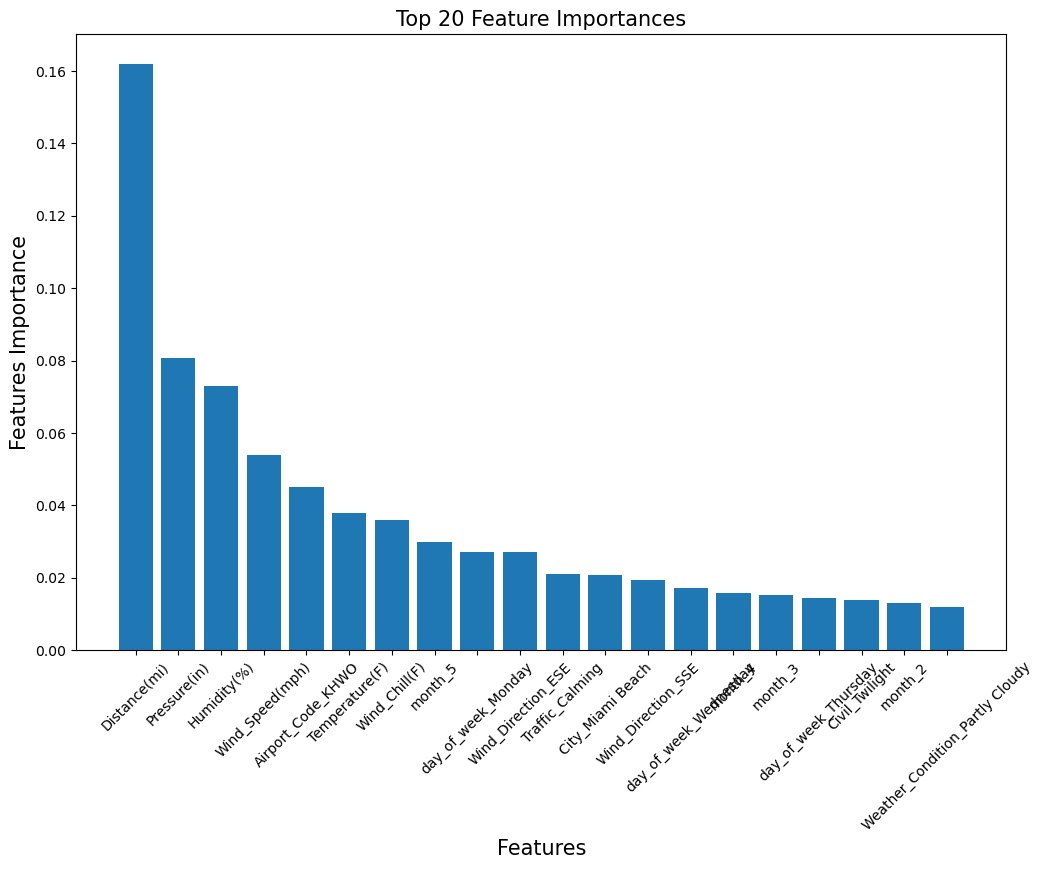

In [81]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Print the top 20 feature importances
print("Top 20 Feature Importances:")
for i in range(20):
    feature_index = sorted_indices[i]
    feature_name = train.drop(columns='Duration_Minutes').columns[feature_index]
    print(f"{feature_name}: {feature_importances[feature_index]:.4f}")

# Visualize the top 20 feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(20), feature_importances[sorted_indices[:20]])
plt.xticks(range(20), train.drop(columns='Duration_Minutes').columns[sorted_indices[:20]], rotation=45)
plt.xlabel('Features', fontsize='15')
plt.ylabel('Features Importance', fontsize='15')
plt.title('Top 20 Feature Importances', fontsize='15')
plt.show()

##### Feature Selection - Remove Feature With Imporatance < 0.0012

In [82]:
threshold = 0.0012

# Extract columns with importance less than the threshold
low_importance_columns_1 = df_encoded.drop(columns = 'Duration_Minutes').columns[feature_importances < threshold]
df_encoded_remove_fi_1 = df_encoded.drop(columns=low_importance_columns_1)
# print(df_encoded.shape[1])

# Model Train
train, test, model = model_train(df_encoded_remove_fi_1, rf_regressor)

# Performance Metrics
metric_results, train_r2_scores, val_r2_scores = evaluator(train, test, train_r2_scores, val_r2_scores, model, 'Random Forest Regression - Remove Feature Importance < 0.0012')

model_result = pd.concat([model_result, pd.DataFrame([metric_results])], ignore_index=True)
model_result


,Model,Train MAE,Train MSE,Train RMSE,Test MAE,Test MSE,Test RMSE,Train R²,Test R²,R² Diff.(Train-Test)
0,Random Forest Regression - Base Model,24.066238,7211.961913,84.923271,63.111907,57287.233772,239.347517,0.946345,0.619423,0.326922
1,Random Forest Regression - Remove Feature Impo...,24.108611,7244.410353,85.114102,63.012044,57163.864120,239.089657,0.946104,0.620242,0.325861


In [83]:
print("Improvement (Round 1): Features Dropped, importance < ", threshold)
print(list(low_importance_columns_1.values))

Improvement (Round 1): Features Dropped, importance <  0.0012
['Amenity', 'Bump', 'Give_Way', 'No_Exit', 'Roundabout', 'Turning_Loop', 'Severity_1', 'Severity_3', 'month_8', 'City_Aventura', 'City_Bal Harbour', 'City_Bay Harbor Islands', 'City_Biscayne Park', 'City_Coral Gables', 'City_Cutler Bay', 'City_Doral', 'City_El Portal', 'City_Florida City', 'City_Golden Beach', 'City_Hollywood', 'City_Homestead', 'City_Key Biscayne', 'City_Medley', 'City_Miami Lakes', 'City_Miami Shores', 'City_Miami Springs', 'City_North Bay Village', 'City_North Westside', 'City_Opa-Locka', 'City_Palmetto Bay', 'City_South Miami', 'City_Sunny Isles Beach', 'City_Surfside', 'City_Sweetwater', 'City_Virginia Gardens', 'City_West Miami', 'Wind_Direction_Calm', 'Wind_Direction_East', 'Wind_Direction_NNE', 'Wind_Direction_North', 'Wind_Direction_South', 'Wind_Direction_Variable', 'Wind_Direction_West', 'Weather_Condition_Clear', 'Weather_Condition_Drizzle', 'Weather_Condition_Fair / Windy', 'Weather_Condition_Fo

##### Feature Selection - Remove Feature With Imporatance < 0.0100

In [84]:
threshold = 0.0100

# Extract columns with importance less than the threshold
low_importance_columns_2 = df_encoded.drop(columns = 'Duration_Minutes').columns[feature_importances < threshold]
df_encoded_remove_fi_2 = df_encoded.drop(columns=low_importance_columns_2)

# Model Train
train, test, model = model_train(df_encoded_remove_fi_2, rf_regressor)

# Performance Metrics
metric_results, train_r2_scores, val_r2_scores = evaluator(train, test, train_r2_scores, val_r2_scores, model, 'Random Forest Regression - Remove Feature Importance < 0.0100')

model_result = pd.concat([model_result, pd.DataFrame([metric_results])], ignore_index=True)
model_result

,Model,Train MAE,Train MSE,Train RMSE,Test MAE,Test MSE,Test RMSE,Train R²,Test R²,R² Diff.(Train-Test)
0,Random Forest Regression - Base Model,24.066238,7211.961913,84.923271,63.111907,57287.233772,239.347517,0.946345,0.619423,0.326922
1,Random Forest Regression - Remove Feature Impo...,24.108611,7244.410353,85.114102,63.012044,57163.864120,239.089657,0.946104,0.620242,0.325861
2,Random Forest Regression - Remove Feature Impo...,27.194871,8168.574810,90.380168,69.257232,56761.479498,238.246678,0.939228,0.622915,0.316313


In [85]:
print("Improvement (Round 2): Features Dropped, importance < ", threshold)
print(low_importance_columns_2.values)

Improvement (Round 2): Features Dropped, importance <  0.01
['Visibility(mi)' 'Precipitation(in)' 'Amenity' 'Bump' 'Crossing'
 'Give_Way' 'Junction' 'No_Exit' 'Railway' 'Roundabout' 'Station' 'Stop'
 'Traffic_Signal' 'Turning_Loop' 'Sunrise_Sunset' 'Nautical_Twilight'
 'Astronomical_Twilight' 'Severity_1' 'Severity_2' 'Severity_3'
 'Severity_4' 'day_of_week_Friday' 'day_of_week_Saturday'
 'day_of_week_Sunday' 'day_of_week_Tuesday' 'month_1' 'month_6' 'month_7'
 'month_8' 'month_9' 'month_10' 'month_11' 'month_12' 'City_Aventura'
 'City_Bal Harbour' 'City_Bay Harbor Islands' 'City_Biscayne Park'
 'City_Coral Gables' 'City_Cutler Bay' 'City_Doral' 'City_El Portal'
 'City_Florida City' 'City_Golden Beach' 'City_Hialeah' 'City_Hollywood'
 'City_Homestead' 'City_Key Biscayne' 'City_Medley' 'City_Miami'
 'City_Miami Gardens' 'City_Miami Lakes' 'City_Miami Shores'
 'City_Miami Springs' 'City_North Bay Village' 'City_North Miami'
 'City_North Miami Beach' 'City_North Westside' 'City_Opa Locka'

In [86]:
threshold = 0.0150

# Extract columns with importance less than the threshold
low_importance_columns_3 = df_encoded.drop(columns = 'Duration_Minutes').columns[feature_importances < threshold]
df_encoded_remove_fi_3 = df_encoded.drop(columns=low_importance_columns_3)

# Model Train
train, test, model = model_train(df_encoded_remove_fi_3, rf_regressor)

# Performance Metrics
metric_results, train_r2_scores, val_r2_scores = evaluator(train, test, train_r2_scores, val_r2_scores, model, 'RF Regression - Remove Feature Importance < 0.0150')

model_result = pd.concat([model_result, pd.DataFrame([metric_results])], ignore_index=True)
model_result

,Model,Train MAE,Train MSE,Train RMSE,Test MAE,Test MSE,Test RMSE,Train R²,Test R²,R² Diff.(Train-Test)
0,Random Forest Regression - Base Model,24.066238,7211.961913,84.923271,63.111907,57287.233772,239.347517,0.946345,0.619423,0.326922
1,Random Forest Regression - Remove Feature Impo...,24.108611,7244.410353,85.114102,63.012044,57163.864120,239.089657,0.946104,0.620242,0.325861
2,Random Forest Regression - Remove Feature Impo...,27.194871,8168.574810,90.380168,69.257232,56761.479498,238.246678,0.939228,0.622915,0.316313
3,RF Regression - Remove Feature Importance < 0....,28.305063,8379.658151,91.540473,71.728920,55862.324093,236.352119,0.937658,0.628889,0.308769


In [87]:
print("Improvement (Round 3): Features Dropped, importance < ", threshold)
print(list(low_importance_columns_3.values))

Improvement (Round 3): Features Dropped, importance <  0.015
['Visibility(mi)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Severity_1', 'Severity_2', 'Severity_3', 'Severity_4', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'month_1', 'month_2', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'City_Aventura', 'City_Bal Harbour', 'City_Bay Harbor Islands', 'City_Biscayne Park', 'City_Coral Gables', 'City_Cutler Bay', 'City_Doral', 'City_El Portal', 'City_Florida City', 'City_Golden Beach', 'City_Hialeah', 'City_Hollywood', 'City_Homestead', 'City_Key Biscayne', 'City_Medley', 'City_Miami', 'City_Miami Gardens', 'City_Miami Lakes', 'City_Miami Shores', 'City_Miami Springs', 'City_North B

In [88]:
# Prepare the list of training set and validation set result
print(train_r2_scores)
print(val_r2_scores)

[0.9463450023502744, 0.9461035949568791, 0.9392280675483715, 0.9376576660020761]
[0.6194225833355487, 0.6202421673951884, 0.6229153371315226, 0.628888714072461]


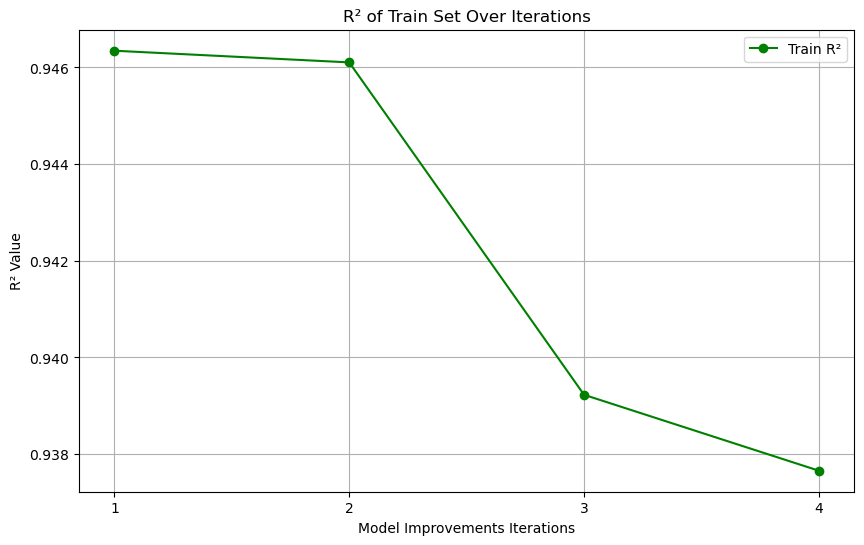

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values representing the iterations
iterations = np.arange(1, len(train_r2_scores) + 1)

# Plotting Train R² values
plt.figure(figsize=(10, 6))

plt.plot(iterations, train_r2_scores, marker='o', label='Train R²', color='green')

plt.xlabel('Model Improvements Iterations')
plt.ylabel('R² Value')
plt.title('R² of Train Set Over Iterations')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

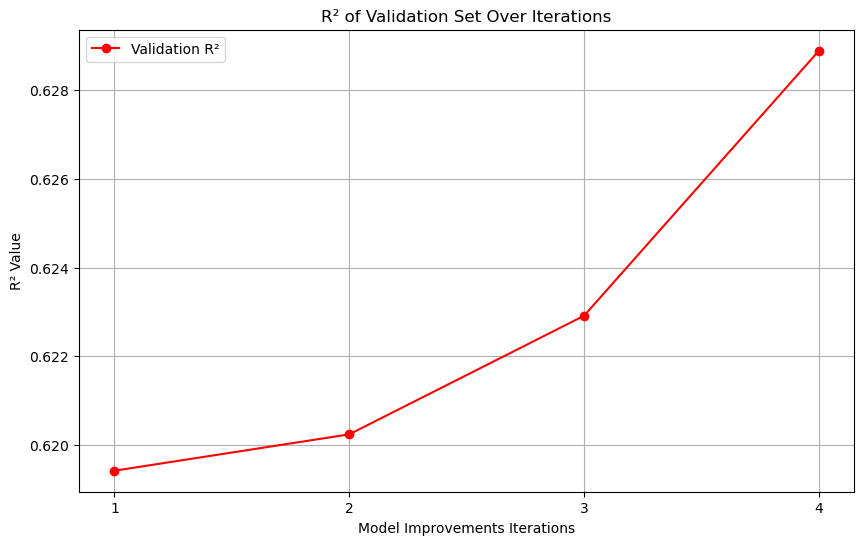

In [90]:
# Plotting Validation R² values
plt.figure(figsize=(10, 6))

plt.plot(iterations, val_r2_scores, marker='o', label='Validation R²', color='red')

plt.xlabel('Model Improvements Iterations')
plt.ylabel('R² Value')
plt.title('R² of Validation Set Over Iterations')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

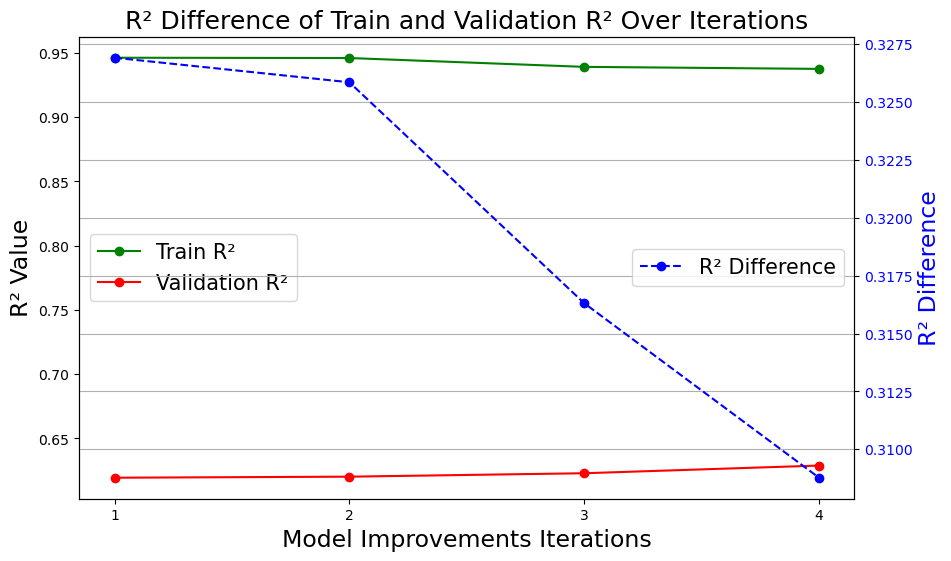

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of x values representing the iterations
iterations = np.arange(1, len(train_r2_scores) + 1)

# Calculate the difference in R²
r2_difference = np.array(train_r2_scores) - np.array(val_r2_scores)

# Plotting Train and Validation R² values
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(iterations, train_r2_scores, marker='o', label='Train R²', color='green')
ax1.plot(iterations, val_r2_scores, marker='o', label='Validation R²', color='red')

ax1.set_xlabel('Model Improvements Iterations', fontsize=17)
ax1.set_ylabel('R² Value', color='black', fontsize=17)
ax1.tick_params(axis='y', labelcolor='black')

# Create a secondary y-axis to plot the difference in R²
ax2 = ax1.twinx()
ax2.plot(iterations, r2_difference, linestyle='--', marker='o', label='R² Difference', color='blue')
ax1.legend(loc='center left', fontsize='15')

ax2.set_ylabel('R² Difference', color='blue', fontsize=17)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc='center right', fontsize='15')

plt.title('R² Difference of Train and Validation R² Over Iterations', fontsize=18)
plt.xticks(iterations)
plt.grid(True)
plt.show()
